In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_excel(r'C:\Users\juesg\Desktop\DATA SCIENCE\Modulo No. 6\Proyecto Integrador\Propuesta 1\BBDD_Hospitalización.xlsx')
df

c:\Users\juesg\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
565,69,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0


Eliminamos DIAS HOSPITALIZACION MQ, DIAS HOSPITALIZACIÓN UPC, HOSPITALIZACION pues para nuestra definición de paciente y objeto de estudio es irrelevante cuantos días fue hospitalizado.

In [114]:
df.drop(['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'], axis=1, inplace=True)
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO
565,69,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO


Revisamos valores nulos

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Al encontrar agente aislado vacíos, podemos inferir que si no hay tipo de cultivo no fue posible determinar si la persona se debía aislar o no, por lo que procederemos a llenar los valores nulos de dicha columna con base en este análisis

In [116]:
for ind, elemento in enumerate(df['AGENTE AISLADO']):
    if df['TIPO DE CULTIVO'][ind] == 'NO':
        df['AGENTE AISLADO'][ind] = 'NO'
    else:
        df['AGENTE AISLADO'][ind] = df['AGENTE AISLADO'][ind]
        

C:\Users\juesg\AppData\Local\Temp\ipykernel_25296\450197077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGENTE AISLADO'][ind] = 'NO'
C:\Users\juesg\AppData\Local\Temp\ipykernel_25296\450197077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGENTE AISLADO'][ind] = 'NO'
C:\Users\juesg\AppData\Local\Temp\ipykernel_25296\450197077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGENTE AISLADO'][ind] = df['AGENT

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Revisamos datos atípicos y desviaciones

In [118]:
df['EDAD'].describe()

count    568.000000
mean      63.882042
std        9.281517
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max      151.000000
Name: EDAD, dtype: float64

Como es altamente improbable una persona con edad de 151, 143 procedemos a cambiar este valor por 51 y 43.

In [119]:
df['EDAD'].replace(to_replace=151, value=51, regex=True, inplace=True)
df['EDAD'].replace(to_replace=143, value=43, regex=True, inplace=True)

In [120]:
df['EDAD'].describe()

count    568.000000
mean      63.529930
std        7.915726
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: EDAD, dtype: float64

In [121]:
df['PSA'].describe()

count    564.000000
mean      13.271401
std       15.668966
min        0.600000
25%        5.600000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

Al haber 4 datos faltantes imputaremos estos valores con la media

In [122]:
df['PSA'] = df['PSA'].fillna(df['PSA'].mean())

In [123]:
df['NUMERO DE MUESTRAS TOMADAS'].describe()

count    568.000000
mean      12.996479
std        3.921180
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: NUMERO DE MUESTRAS TOMADAS, dtype: float64

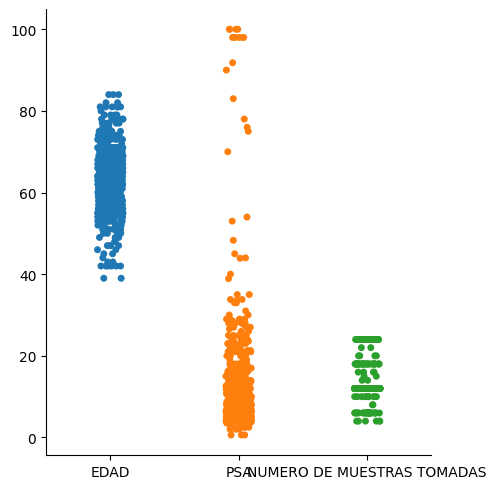

In [124]:
sns.catplot(data=df)

Variables categóricas

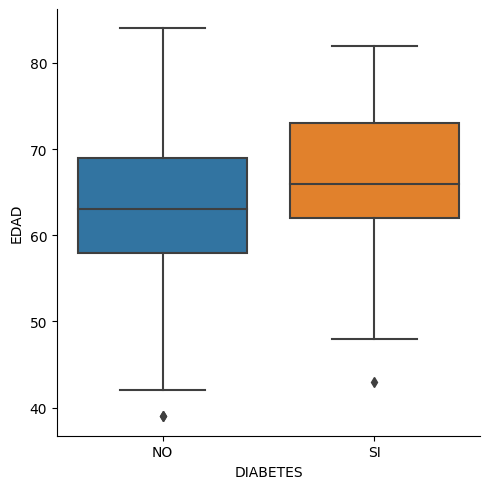

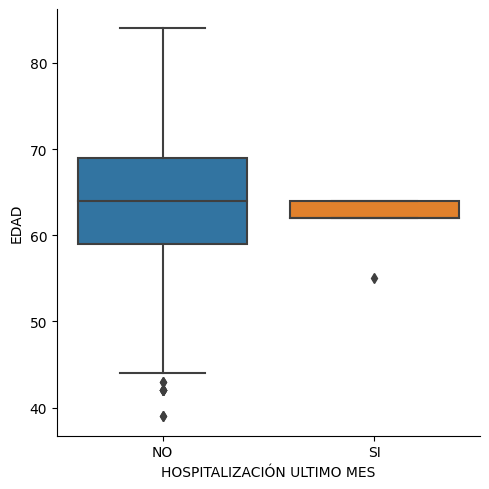

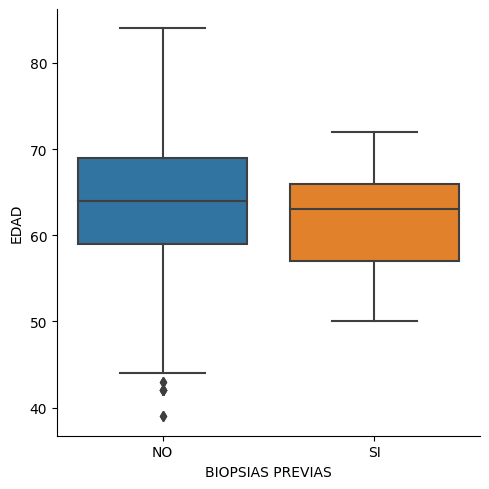

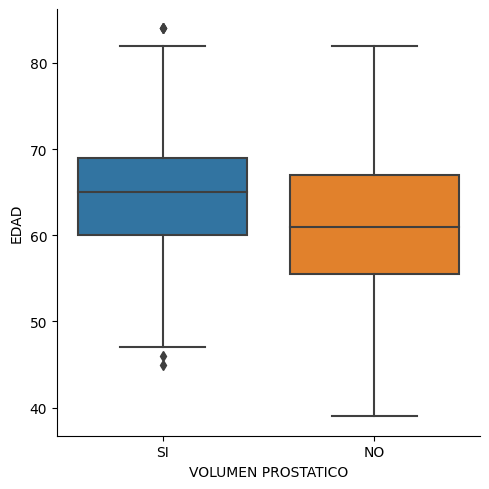

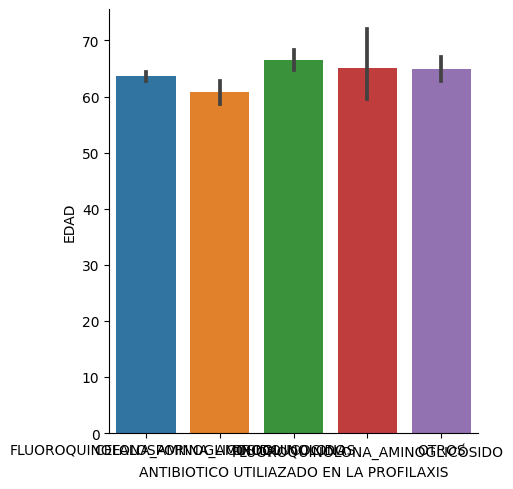

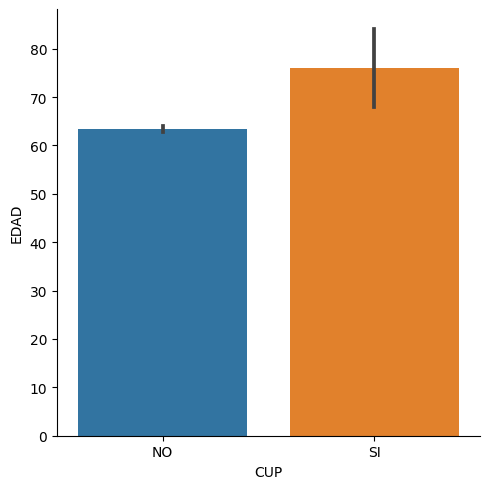

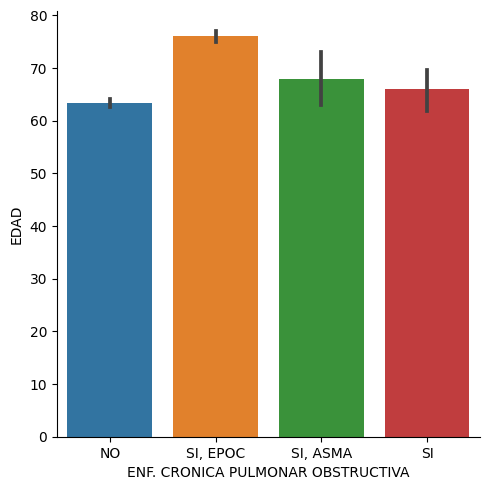

In [125]:
sns.catplot(data=df, x="DIABETES", y= "EDAD", kind="box")
sns.catplot(data=df, x="HOSPITALIZACIÓN ULTIMO MES", y='EDAD', kind="box")
sns.catplot(data=df, x="BIOPSIAS PREVIAS", y='EDAD', kind="box")
sns.catplot(data=df, x="VOLUMEN PROSTATICO", y='EDAD', kind="box")
sns.catplot(data=df, x="ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS", y='EDAD', kind="bar")
sns.catplot(data=df, x="CUP", y='EDAD', kind="bar")
sns.catplot(data=df, x="ENF. CRONICA PULMONAR OBSTRUCTIVA", y='EDAD', kind="bar")




In [126]:
df['BIOPSIA'].value_counts()

BIOPSIA
NEG                                           322
ADENOCARCINOMA GLEASON 7                      106
ADENOCARCINOMA GLEASON 6                       38
ADENOCARCINOMA GLEASON 8                       22
ADENOCARCINOMA GLEASON 9                       20
ADENOCARCINOMA GLEASON 6                       16
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         14
ADENOCARCINOMA GLEASON 7                       10
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64

In [127]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NO    542
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64

Como esta es una mezcla de valores no numéricos y numéricos, definiremos los casos NO por 0 y cambiamos el tipo de dato a int

In [128]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace(to_replace='NO', value=0, inplace=True)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(int)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
0    542
2      9
3      8
1      5
5      2
9      2
Name: count, dtype: int64

In [129]:
df['FIEBRE'].value_counts()

FIEBRE
NO    531
SI     37
Name: count, dtype: int64

In [130]:
df['ITU'].value_counts()

ITU
NO    562
SI      6
Name: count, dtype: int64

In [131]:
df['TIPO DE CULTIVO'].value_counts()

TIPO DE CULTIVO
NO                          560
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64

In [132]:
df['AGENTE AISLADO'].value_counts()

AGENTE AISLADO
NO                        560
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64

In [133]:
df['PATRON DE RESISTENCIA'].value_counts()

PATRON DE RESISTENCIA
NO                                                                                 561
RESISTENTE A AMPI, CIPRO Y GENTA                                                     2
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA      2
MULTI SENSIBLE                                                                       2
 AMPI R, CIPRO R, GENTA R, SULFA M R                                                 1
Name: count, dtype: int64

Se identifico que para los nan en hospitalización los días de hospitalización eran 0. Por lo que se procederá a imputar estos faltantes con NO

In [134]:
df['HOSPITALIZACION'].fillna('NO', inplace=True)

Revisamos los nulos

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Imputaremos los faltantes en biopsias previas por No. Dada la probabilidad de que sean NO.

In [136]:
df['BIOPSIAS PREVIAS'].value_counts()

BIOPSIAS PREVIAS
NO    510
SI     56
Name: count, dtype: int64

In [137]:
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].fillna('NO')

In [138]:
df['BIOPSIAS PREVIAS'].value_counts()

BIOPSIAS PREVIAS
NO    512
SI     56
Name: count, dtype: int64

Imputaremos los faltantes de volumen prostático con SI dada la probabilidad

In [139]:
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].fillna('SI')

In [140]:
df['VOLUMEN PROSTATICO'].value_counts()

VOLUMEN PROSTATICO
SI    409
NO    159
Name: count, dtype: int64

Imputaremos los faltantes de CUP prostático con NO dada la probabilidad

In [141]:
df['CUP'].value_counts()

CUP
NO    563
SI      4
Name: count, dtype: int64

In [142]:
df['CUP'] = df['CUP'].fillna('NO')

In [143]:
df['CUP'].value_counts()

CUP
NO    564
SI      4
Name: count, dtype: int64

Imputaremos los faltantes de enfermedad crónica pulmonar con NO dada la probabilidad

In [144]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          546
SI           12
SI, EPOC      4
SI, ASMA      4
Name: count, dtype: int64

In [145]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    object 
 5   VOLUMEN PROSTATICO                                                         568 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Dado que el PSA y el número de muestras tomadas se miden en una escala diferente, procederemos a normalizarlas.

<Axes: >

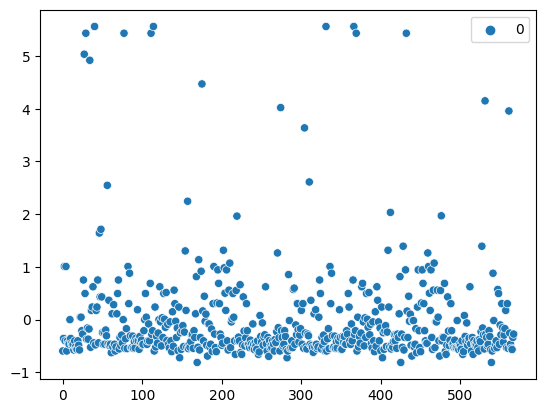

In [147]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = df['PSA']
x = np.array(x)
x = x.reshape(-1,1)
np.shape(x)
std_data = ss.fit_transform(x)
sns.scatterplot(data=std_data)


<Axes: >

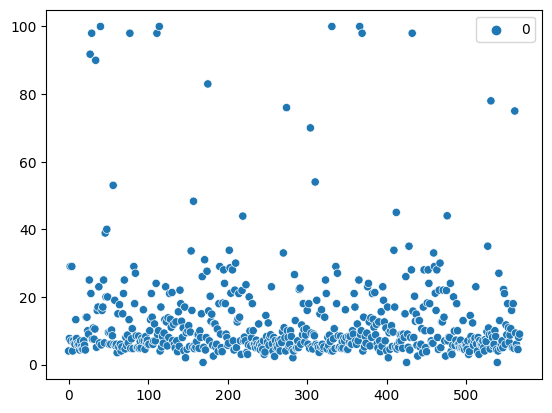

In [148]:
sns.scatterplot(data=x)

In [149]:
df['PSA_STD'] = std_data

<Axes: >

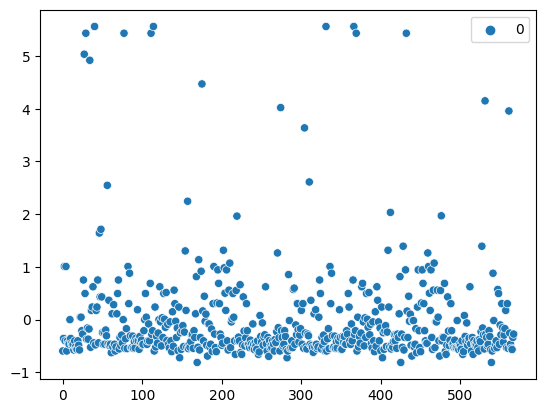

In [150]:
x = df['NUMERO DE MUESTRAS TOMADAS']
x = np.array(x)
x = x.reshape(-1,1)
np.shape(x)
std_data2 = ss.fit_transform(x)
sns.scatterplot(data=std_data)

<Axes: >

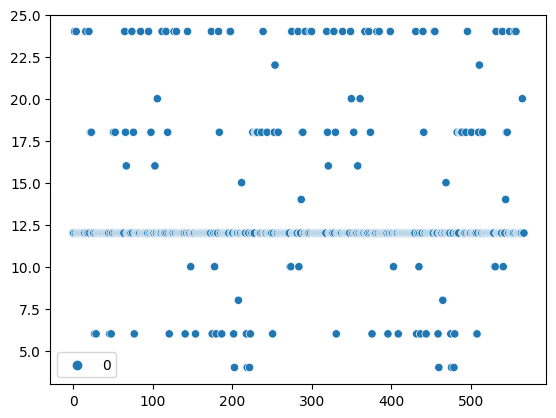

In [151]:
sns.scatterplot(data=x)

In [152]:
df['NUMERO DE MUESTRAS TOMADAS STD'] = std_data2

In [153]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,-0.594326,-0.254351
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,-0.357145,-0.254351
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,-0.402017,-0.254351
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,1.008253,2.808650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,-0.466120,-0.254351
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,-0.543044,-0.254351
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,-0.566762,1.787649
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,-0.337914,-0.254351


Como debemos tener valores numéricos, utilizaremos el label encoder de sklearn para realizar las conversiones

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['DIABETES'])
df['DIABETES_L'] = le.transform(df['DIABETES']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,SI,NO,NO,NO,NO,SI,-0.594326,-0.254351,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,SI,NO,NO,NO,NO,SI,-0.357145,-0.254351,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,SI,NO,NO,NO,NO,SI,-0.402017,-0.254351,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,1.008253,2.808650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,NO,NO,NO,NO,NO,NO,-0.466120,-0.254351,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,0,NO,NO,NO,NO,NO,NO,-0.543044,-0.254351,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,0,NO,NO,NO,NO,NO,NO,-0.566762,1.787649,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,NO,NO,NO,NO,NO,NO,-0.337914,-0.254351,0


In [156]:
le = LabelEncoder()
le.fit(df['HOSPITALIZACIÓN ULTIMO MES'])
df['HOSPITALIZACIÓN_ULTIMO_MES_L'] = le.transform(df['HOSPITALIZACIÓN ULTIMO MES']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,SI,NO,NO,NO,NO,SI,-0.594326,-0.254351,0,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,SI,NO,NO,NO,NO,SI,-0.357145,-0.254351,0,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650,0,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,SI,NO,NO,NO,NO,SI,-0.402017,-0.254351,0,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,1.008253,2.808650,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,NO,NO,-0.466120,-0.254351,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,NO,NO,NO,NO,NO,NO,-0.543044,-0.254351,0,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,NO,NO,NO,NO,NO,NO,-0.566762,1.787649,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,NO,NO,-0.337914,-0.254351,0,0


In [157]:
le = LabelEncoder()
le.fit(df['BIOPSIAS PREVIAS'])
df['BIOPSIAS_PREVIAS_L'] = le.transform(df['BIOPSIAS PREVIAS']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,SI,-0.594326,-0.254351,0,0,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,SI,-0.357145,-0.254351,0,0,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650,0,0,1
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,SI,-0.402017,-0.254351,0,0,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,NO,HEMOCULTIVO,E.COLI,NO,SI,1.008253,2.808650,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,NO,-0.466120,-0.254351,0,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,NO,NO,NO,NO,NO,-0.543044,-0.254351,0,0,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,NO,NO,NO,NO,NO,-0.566762,1.787649,0,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,NO,-0.337914,-0.254351,0,0,0


In [158]:
le = LabelEncoder()
le.fit(df['VOLUMEN PROSTATICO'])
df['VOLUMEN_PROSTATICO_L'] = le.transform(df['VOLUMEN PROSTATICO']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,SI,-0.594326,-0.254351,0,0,0,1
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,SI,-0.357145,-0.254351,0,0,0,1
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650,0,0,1,1
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,SI,-0.402017,-0.254351,0,0,0,1
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,HEMOCULTIVO,E.COLI,NO,SI,1.008253,2.808650,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,-0.466120,-0.254351,0,0,0,1
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,NO,NO,NO,NO,-0.543044,-0.254351,0,0,0,1
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,NO,NO,NO,NO,-0.566762,1.787649,0,0,0,1
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,NO,-0.337914,-0.254351,0,0,0,1


In [159]:
le = LabelEncoder()
le.fit(df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'])
df['ANTIBIOTICO_L'] = le.transform(df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,SI,-0.594326,-0.254351,0,0,0,1,1
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,SI,-0.357145,-0.254351,0,0,0,1,1
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650,0,0,1,1,1
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,SI,-0.402017,-0.254351,0,0,0,1,1
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,E.COLI,NO,SI,1.008253,2.808650,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,-0.466120,-0.254351,0,0,0,1,1
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,NO,NO,NO,-0.543044,-0.254351,0,0,0,1,4
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,NO,NO,NO,-0.566762,1.787649,0,0,0,1,1
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,NO,-0.337914,-0.254351,0,0,0,1,1


In [160]:
le = LabelEncoder()
le.fit(df['CUP'])
df['CUP_L'] = le.transform(df['CUP']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,PATRON DE RESISTENCIA,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,SI,-0.594326,-0.254351,0,0,0,1,1,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,SI,-0.357145,-0.254351,0,0,0,1,1,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,1.008253,2.808650,0,0,1,1,1,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,SI,-0.402017,-0.254351,0,0,0,1,1,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,NO,SI,1.008253,2.808650,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,-0.466120,-0.254351,0,0,0,1,1,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,NO,NO,-0.543044,-0.254351,0,0,0,1,4,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,NO,NO,-0.566762,1.787649,0,0,0,1,1,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,NO,-0.337914,-0.254351,0,0,0,1,1,0


In [161]:
le = LabelEncoder()
le.fit(df['ENF. CRONICA PULMONAR OBSTRUCTIVA'])
df['ENFERMEDAD_PULMONAR_L'] = le.transform(df['ENF. CRONICA PULMONAR OBSTRUCTIVA']) 
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,HOSPITALIZACION,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,SI,-0.594326,-0.254351,0,0,0,1,1,0,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,SI,-0.357145,-0.254351,0,0,0,1,1,0,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,SI,1.008253,2.808650,0,0,1,1,1,0,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,SI,-0.402017,-0.254351,0,0,0,1,1,0,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,SI,1.008253,2.808650,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,-0.466120,-0.254351,0,0,0,1,1,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,NO,-0.543044,-0.254351,0,0,0,1,4,0,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,NO,-0.566762,1.787649,0,0,0,1,1,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,NO,-0.337914,-0.254351,0,0,0,1,1,0,0


In [163]:
le = LabelEncoder()
le.fit(df['BIOPSIA'])
df['BIOPSIA_L'] = le.transform(df['BIOPSIA'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.594326,-0.254351,0,0,0,1,1,0,0,9
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.357145,-0.254351,0,0,0,1,1,0,0,9
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1.008253,2.808650,0,0,1,1,1,0,0,9
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.402017,-0.254351,0,0,0,1,1,0,0,9
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1.008253,2.808650,0,0,1,1,1,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.466120,-0.254351,0,0,0,1,1,0,0,1
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,-0.543044,-0.254351,0,0,0,1,4,0,0,4
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,-0.566762,1.787649,0,0,0,1,1,0,0,9
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.337914,-0.254351,0,0,0,1,1,0,0,4


In [164]:
le = LabelEncoder()
le.fit(df['FIEBRE'])
df['FIEBRE_L'] = le.transform(df['FIEBRE'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.254351,0,0,0,1,1,0,0,9,1
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.254351,0,0,0,1,1,0,0,9,1
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,2.808650,0,0,1,1,1,0,0,9,1
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.254351,0,0,0,1,1,0,0,9,1
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,2.808650,0,0,1,1,1,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.254351,0,0,0,1,1,0,0,1,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,-0.254351,0,0,0,1,4,0,0,4,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,1.787649,0,0,0,1,1,0,0,9,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,-0.254351,0,0,0,1,1,0,0,4,0


In [165]:
le = LabelEncoder()
le.fit(df['ITU'])
df['ITU_L'] = le.transform(df['ITU'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,0,1,1,0,0,9,1,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,0,1,1,0,0,9,1,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,0,0,1,1,1,0,0,9,1,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,0,1,1,0,0,9,1,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,0,0,1,1,1,0,0,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,0,1,1,0,0,1,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,0,0,0,1,4,0,0,4,0,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,0,0,0,1,1,0,0,9,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,0,1,1,0,0,4,0,0


In [166]:
le = LabelEncoder()
le.fit(df['TIPO DE CULTIVO'])
df['TIPO_DE_CULTIVO_L'] = le.transform(df['TIPO DE CULTIVO'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L,TIPO_DE_CULTIVO_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,1,1,0,0,9,1,0,2
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,1,1,0,0,9,1,0,2
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,0,1,1,1,0,0,9,1,0,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,1,1,0,0,9,1,0,2
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,0,1,1,1,0,0,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,1,1,0,0,1,0,0,2
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,0,0,1,4,0,0,4,0,0,2
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,0,0,1,1,0,0,9,0,0,2
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,0,1,1,0,0,4,0,0,2


In [167]:
le = LabelEncoder()
le.fit(df['AGENTE AISLADO'])
df['AGENTE_AISLADO_L'] = le.transform(df['AGENTE AISLADO'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L,TIPO_DE_CULTIVO_L,AGENTE_AISLADO_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,1,1,0,0,9,1,0,2,1
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,1,1,0,0,9,1,0,2,1
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,1,1,0,0,9,1,0,0,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,1,1,0,0,9,1,0,2,1
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,1,1,0,0,9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,1,1,0,0,1,0,0,2,1
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,0,1,4,0,0,4,0,0,2,1
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,0,1,1,0,0,9,0,0,2,1
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,0,1,1,0,0,4,0,0,2,1


In [168]:
le = LabelEncoder()
le.fit(df['PATRON DE RESISTENCIA'])
df['PATRON_DE_RESISTENCIA_L'] = le.transform(df['PATRON DE RESISTENCIA'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L,TIPO_DE_CULTIVO_L,AGENTE_AISLADO_L,PATRON_DE_RESISTENCIA_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,1,0,0,9,1,0,2,1,2
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,1,0,0,9,1,0,2,1,2
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,1,0,0,9,1,0,0,0,0
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,1,0,0,9,1,0,2,1,2
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,1,0,0,9,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,1,0,0,1,0,0,2,1,2
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,1,4,0,0,4,0,0,2,1,2
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,1,1,0,0,9,0,0,2,1,2
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,1,0,0,4,0,0,2,1,2


In [169]:
le = LabelEncoder()
le.fit(df['HOSPITALIZACION'])
df['HOSPITALIZACION_L'] = le.transform(df['HOSPITALIZACION'])
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L,TIPO_DE_CULTIVO_L,AGENTE_AISLADO_L,PATRON_DE_RESISTENCIA_L,HOSPITALIZACION_L
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,9,1,0,2,1,2,1
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,9,1,0,2,1,2,1
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,0,0,9,1,0,0,0,0,1
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,9,1,0,2,1,2,1
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,1,0,0,9,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,1,0,0,2,1,2,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,...,4,0,0,4,0,0,2,1,2,0
565,69,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,...,1,0,0,9,0,0,2,1,2,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,4,0,0,2,1,2,0


Procedemos a exportar el dataframe para tener el histórico antes de hacer drop a columnas

In [170]:
df.to_excel('df_sindrop.xlsx')

Ahora haremos el drop de columnas no normalizadas o formateadas

In [171]:
df.drop(['DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA','BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA','PSA', 'NUMERO DE MUESTRAS TOMADAS', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','HOSPITALIZACION'], axis=1, inplace=True)

In [172]:
df

,EDAD,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L,TIPO_DE_CULTIVO_L,AGENTE_AISLADO_L,PATRON_DE_RESISTENCIA_L,HOSPITALIZACION_L
0,53,-0.594326,-0.254351,0,0,0,1,1,0,0,9,1,0,2,1,2,1
1,56,-0.357145,-0.254351,0,0,0,1,1,0,0,9,1,0,2,1,2,1
2,57,1.008253,2.808650,0,0,1,1,1,0,0,9,1,0,0,0,0,1
3,56,-0.402017,-0.254351,0,0,0,1,1,0,0,9,1,0,2,1,2,1
4,55,1.008253,2.808650,0,0,1,1,1,0,0,9,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,-0.466120,-0.254351,0,0,0,1,1,0,0,1,0,0,2,1,2,0
564,64,-0.543044,-0.254351,0,0,0,1,4,0,0,4,0,0,2,1,2,0
565,69,-0.566762,1.787649,0,0,0,1,1,0,0,9,0,0,2,1,2,0
566,67,-0.337914,-0.254351,0,0,0,1,1,0,0,4,0,0,2,1,2,0


Matriz de correlación

In [173]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(20,20))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 10},cmap= 'coolwarm')
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

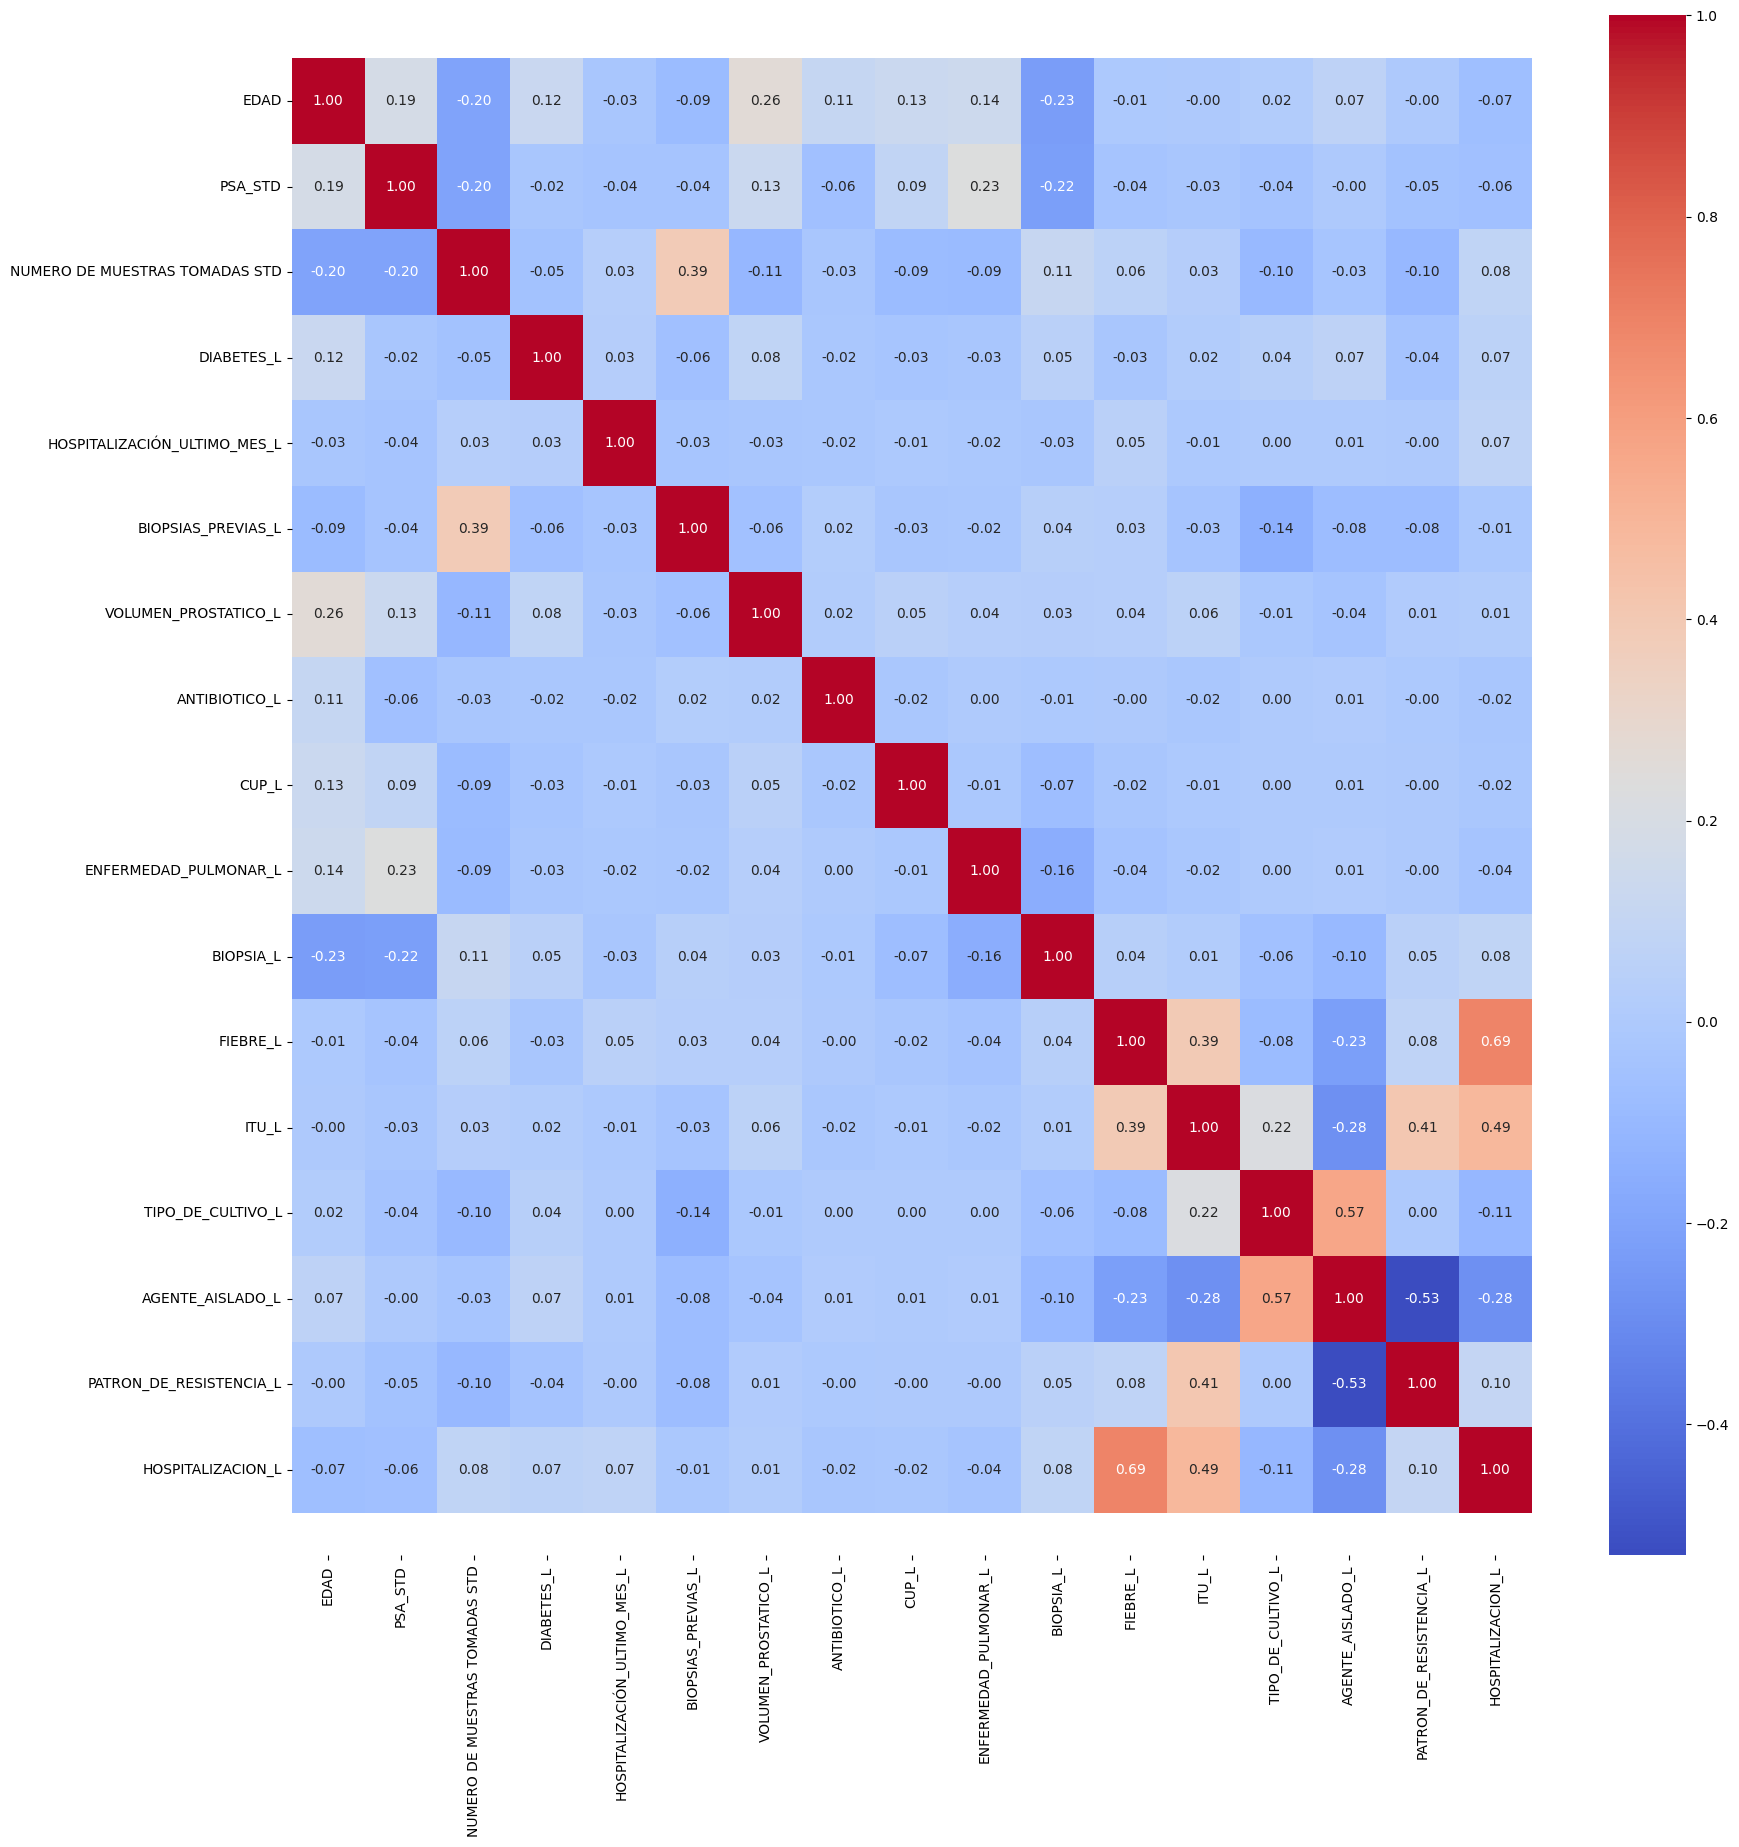

In [174]:
corr = df.corr()
plot_corre_heatmap(corr)

Exportamos la base de datos a un archivo CSV

In [175]:
df.to_csv('mlfile.csv')